In [36]:
import pandas as pd
M2019 = pd.read_csv('MICRODADOS_ENEM_2019.csv',sep=';',encoding='latin-1')

In [37]:
M2019=M2019[['NU_ANO','TP_SEXO','TP_FAIXA_ETARIA','TP_COR_RACA','TP_ESCOLA','NO_MUNICIPIO_PROVA','SG_UF_PROVA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','Q006','Q025']]
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']
M2019['media_notas']=M2019[notas].mean(axis =1)
Nan_out= ['media_notas']
M2019

,NU_ANO,TP_SEXO,TP_FAIXA_ETARIA,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025,media_notas
0,2019,M,13,3,1,Sorocaba,SP,NaN,NaN,NaN,NaN,NaN,A,B,NaN
1,2019,M,8,1,1,Feira de Santana,BA,NaN,NaN,NaN,NaN,NaN,C,B,NaN
2,2019,F,13,3,1,Fortaleza,CE,NaN,NaN,NaN,NaN,NaN,B,B,NaN
3,2019,F,10,1,1,Palmas,TO,483.8,503.6,537.3,392.0,460.0,E,B,475.34
4,2019,F,7,1,1,Contagem,MG,513.6,575.5,570.7,677.0,860.0,G,B,639.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095166,2019,F,14,3,1,Brasília,DF,NaN,NaN,NaN,NaN,NaN,C,B,NaN
5095167,2019,M,5,3,1,Manaus,AM,NaN,578.9,555.5,NaN,500.0,C,B,544.80
5095168,2019,M,6,0,1,Bento Gonçalves,RS,NaN,NaN,NaN,NaN,NaN,C,B,NaN
5095169,2019,M,7,0,1,Bento Gonçalves,RS,NaN,NaN,NaN,NaN,NaN,A,B,NaN


In [38]:
Nan_out= ['media_notas']
M2019_TD_INSCRITOS=M2019.dropna(subset = Nan_out)
M2019_TD_INSCRITOS

,NU_ANO,TP_SEXO,TP_FAIXA_ETARIA,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025,media_notas
3,2019,F,10,1,1,Palmas,TO,483.8,503.6,537.3,392.0,460.0,E,B,475.34
4,2019,F,7,1,1,Contagem,MG,513.6,575.5,570.7,677.0,860.0,G,B,639.36
5,2019,M,13,2,1,Rondonópolis,MT,563.7,644.9,564.2,675.3,800.0,E,B,649.62
6,2019,F,7,3,1,Paulo Afonso,BA,484.6,488.4,507.2,594.7,600.0,B,A,534.98
9,2019,M,2,1,2,São Paulo,SP,543.9,548.1,502.5,480.7,400.0,F,B,495.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095160,2019,F,13,4,1,Teresina,PI,414.6,485.9,406.6,423.4,480.0,C,A,442.10
5095161,2019,F,2,1,2,São Paulo,SP,370.3,407.4,506.7,390.7,460.0,B,A,427.02
5095164,2019,F,12,3,1,Barcarena,PA,499.6,507.8,537.0,498.3,540.0,E,A,516.54
5095165,2019,F,2,3,2,Osasco,SP,409.0,475.0,461.0,389.5,280.0,D,B,402.90


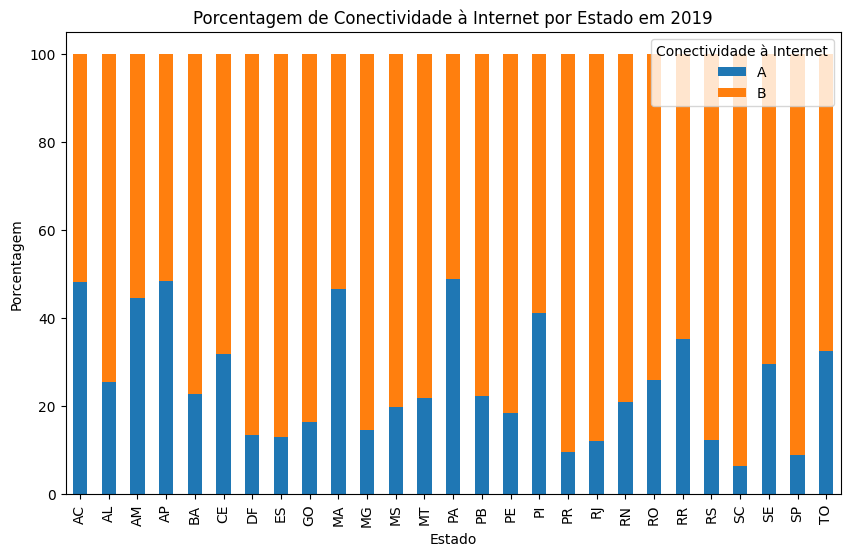

In [39]:
# Supondo que M2020_TD_INSCRITOS seja o DataFrame com as colunas 'SG_UF_PROVA' e 'Q025'

# Calculando a contagem de pessoas por estado e conectividade à internet
connectivity_counts = M2019_TD_INSCRITOS.groupby(['SG_UF_PROVA', 'Q025']).size().unstack(fill_value=0)

# Calculando as porcentagens de conectividade à internet por estado
connectivity_percentages = connectivity_counts.div(connectivity_counts.sum(axis=1), axis=0) * 100

# Plotando um gráfico de barras empilhadas das porcentagens
connectivity_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configurando rótulos e título
plt.xlabel('Estado')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de Conectividade à Internet por Estado em 2019')

# Exibindo o gráfico
plt.legend(title='Conectividade à Internet')
plt.show()

C:\Users\HE_Séries\AppData\Local\Temp\ipykernel_20068\4195105189.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M2019_TD_INSCRITOS['Q025'] = M2019_TD_INSCRITOS['Q025'].replace({'B': 'Tem internet', 'A': 'Não tem internet'})


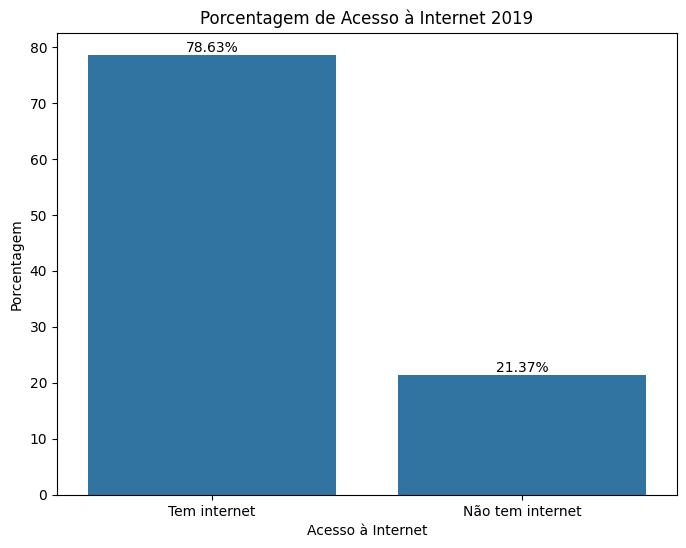

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Substituindo os valores de 'Q025' por rótulos mais descritivos
M2019_TD_INSCRITOS['Q025'] = M2019_TD_INSCRITOS['Q025'].replace({'B': 'Tem internet', 'A': 'Não tem internet'})

# Calculando a porcentagem de acesso à internet
internet_percentage = M2019_TD_INSCRITOS['Q025'].value_counts(normalize=True) * 100

# Criando um gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=internet_percentage.index, y=internet_percentage.values)

# Adicionando rótulos e título
plt.xlabel('Acesso à Internet')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de Acesso à Internet 2019')

# Exibindo as porcentagens
for index, value in enumerate(internet_percentage):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')

# Exibindo o gráfico
plt.show()

In [41]:
M2019_copia = M2019_TD_INSCRITOS.copy()

# Mapear 'A' para 0 e 'B' para 1 na coluna 'Q025'
M2019_copia['Q025'] = M2019_copia['Q025'].replace({'Não tem internet': 0, 'Tem internet': 1})
M2019_copia

,NU_ANO,TP_SEXO,TP_FAIXA_ETARIA,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025,media_notas
3,2019,F,10,1,1,Palmas,TO,483.8,503.6,537.3,392.0,460.0,E,1,475.34
4,2019,F,7,1,1,Contagem,MG,513.6,575.5,570.7,677.0,860.0,G,1,639.36
5,2019,M,13,2,1,Rondonópolis,MT,563.7,644.9,564.2,675.3,800.0,E,1,649.62
6,2019,F,7,3,1,Paulo Afonso,BA,484.6,488.4,507.2,594.7,600.0,B,0,534.98
9,2019,M,2,1,2,São Paulo,SP,543.9,548.1,502.5,480.7,400.0,F,1,495.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095160,2019,F,13,4,1,Teresina,PI,414.6,485.9,406.6,423.4,480.0,C,0,442.10
5095161,2019,F,2,1,2,São Paulo,SP,370.3,407.4,506.7,390.7,460.0,B,0,427.02
5095164,2019,F,12,3,1,Barcarena,PA,499.6,507.8,537.0,498.3,540.0,E,0,516.54
5095165,2019,F,2,3,2,Osasco,SP,409.0,475.0,461.0,389.5,280.0,D,1,402.90


In [42]:
mapeamento_renda = {
    'A': 0,
    'B': 1045,
    'C': 1306.25,  # Média entre 1045 e 1567.50
    'D': 1828.75,  # Média entre 1567.51 e 2090.00
    'E': 2351.25,  # Média entre 2090.01 e 2612.50
    'F': 2873.75,  # Média entre 2612.51 e 3135.00
    'G': 4157.50,  # Média entre 3135.01 e 4180.00
    'H': 4962.50,  # Média entre 4180.01 e 5225.00
    'I': 5677.50,  # Média entre 5225.01 e 6270.00
    'J': 6382.50,  # Média entre 6270.01 e 7315.00
    'K': 7087.50,  # Média entre 7315.01 e 8360.00
    'L': 7792.50,  # Média entre 8360.01 e 9405.00
    'M': 8497.50,  # Média entre 9405.01 e 10450.00
    'N': 9967.50,  # Média entre 10450.01 e 12540.00
    'O': 14107.50,  # Média entre 12540.01 e 15675.00
    'P': 18787.50,  # Média entre 15675.01 e 20900.00
    'Q': 25000  # Valor arbitrário para 'Q' acima de R$ 20.900,00
}

M2019_copia['Q006'] = M2019_copia['Q006'].replace(mapeamento_renda)



In [43]:
mapeamento_idades = {

    1: '< 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: '26 anos',
    12: '31 anos',
    13: '36 anos',
    14: '41 anos',
    15: '46 anos',
    16: '51 anos',
    17: '56 anos',
    18: '61 anos',
    19: '66 anos',
    20: '> 70 anos'
}

M2019_copia['TP_FAIXA_ETARIA'] = M2019_copia['TP_FAIXA_ETARIA'].replace(mapeamento_idades)



In [44]:
mapeando_escola = {
    1: 'Não respondeu',
    2: 'Publica',
    3: 'Privada',
    4: 'Exterior'
}

M2019_copia['TP_ESCOLA'] = M2019_copia['TP_ESCOLA'].replace(mapeando_escola)


In [45]:
mapeamento_raca = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena'
}

M2019_copia['TP_COR_RACA'] = M2019_copia['TP_COR_RACA'].replace(mapeamento_raca)
M2019_copia.rename(columns={'Q025': 'conectividade'}, inplace=True)
M2019_copia.rename(columns={'Q006': 'Renda'}, inplace=True)
M2019_copia

,NU_ANO,TP_SEXO,TP_FAIXA_ETARIA,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Renda,conectividade,media_notas
3,2019,F,25 anos,Branca,Não respondeu,Palmas,TO,483.8,503.6,537.3,392.0,460.0,2351.25,1,475.34
4,2019,F,22 anos,Branca,Não respondeu,Contagem,MG,513.6,575.5,570.7,677.0,860.0,4157.50,1,639.36
5,2019,M,36 anos,Preta,Não respondeu,Rondonópolis,MT,563.7,644.9,564.2,675.3,800.0,2351.25,1,649.62
6,2019,F,22 anos,Parda,Não respondeu,Paulo Afonso,BA,484.6,488.4,507.2,594.7,600.0,1045.00,0,534.98
9,2019,M,17 anos,Branca,Publica,São Paulo,SP,543.9,548.1,502.5,480.7,400.0,2873.75,1,495.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095160,2019,F,36 anos,Amarela,Não respondeu,Teresina,PI,414.6,485.9,406.6,423.4,480.0,1306.25,0,442.10
5095161,2019,F,17 anos,Branca,Publica,São Paulo,SP,370.3,407.4,506.7,390.7,460.0,1045.00,0,427.02
5095164,2019,F,31 anos,Parda,Não respondeu,Barcarena,PA,499.6,507.8,537.0,498.3,540.0,2351.25,0,516.54
5095165,2019,F,17 anos,Parda,Publica,Osasco,SP,409.0,475.0,461.0,389.5,280.0,1828.75,1,402.90


In [46]:
import numpy as np
import statsmodels.formula.api as smf

model = smf.logit("conectividade ~ Renda + TP_SEXO + TP_COR_RACA + media_notas + TP_ESCOLA", data=M2019_copia)

response = model.fit()
response.summary()

Optimization terminated successfully.
         Current function value: 0.426150
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          conectividade   No. Observations:              3931471
Model:                          Logit   Df Residuals:                  3931460
Method:                           MLE   Df Model:                           10
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                  0.1786
Time:                        23:24:52   Log-Likelihood:            -1.6754e+06
converged:                       True   LL-Null:                   -2.0397e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -2.0075      0.013   -159.252      0.000      -2.032      -1.983
TP_SEXO[T.M]                     0.1140      0.003     40.766      0.000       0.108       0.119
TP_COR_RACA[T.Branca]            0.2819      0.009     30.648      0.000       0.264       0.300
TP_COR_RACA[T.Indígena]         -0.5216      0.017    -30.977      0.000      -0.555      -0.489
TP_COR_RACA[T.Não declarado]    -0.1068      0.013     -8.249      0.000      -0.132      -0.081
TP_COR_RACA[T.Parda]            -0.2503      0.009    -28.007      0.000      -0.268      -0.233
TP_COR_RACA[T.Preta]            -0.1673      0.009    -17.784      0.000      -0.186      -0.149
TP_ESCOLA[T.Privada]             0.7514      0.013     55.866      0.000       0.725       0.778
TP_ESCOLA[T.Publica]            -0.0341      0.003    -11.667      0.000      -0.040      -0.028
Renda                            0.0008   1.97e-06    429.358      0.000       0.001       0.001
media_notas                      0.0038   1.86e-05    206.352      0.000       0.004       0.004
================================================================================================
"""

In [47]:
from statsmodels.formula.api import ols

model = ols("media_notas ~ conectividade + Renda + TP_ESCOLA + TP_SEXO + TP_COR_RACA", data=M2019_copia)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            media_notas   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                 1.073e+05
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:25:38   Log-Likelihood:            -2.2641e+07
No. Observations:             3931471   AIC:                         4.528e+07
Df Residuals:                 3931460   BIC:                         4.528e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      473.7150      0.269   1758.184      0.000     473.187     474.243
TP_ESCOLA[T.Privada]            40.8211      0.181    225.777      0.000      40.467      41.176
TP_ESCOLA[T.Publica]           -13.1690      0.088   -149.163      0.000     -13.342     -12.996
TP_SEXO[T.M]                     5.6886      0.079     71.898      0.000       5.534       5.844
TP_COR_RACA[T.Branca]           13.4839      0.264     51.084      0.000      12.967      14.001
TP_COR_RACA[T.Indígena]        -30.6144      0.563    -54.360      0.000     -31.718     -29.511
TP_COR_RACA[T.Não declarado]     4.1294      0.375     11.019      0.000       3.395       4.864
TP_COR_RACA[T.Parda]            -6.2045      0.262    -23.670      0.000      -6.718      -5.691
TP_COR_RACA[T.Preta]            -9.7002      0.279    -34.808      0.000     -10.246      -9.154
conectividade                   30.6717      0.098    312.550      0.000      30.479      30.864
Renda                            0.0067   1.13e-05    592.694      0.000       0.007       0.007
==============================================================================
Omnibus:                   128775.667   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           284111.530
Skew:                          -0.200   Prob(JB):                         0.00
Kurtosis:                       4.255   Cond. No.                     8.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
M2020 = pd.read_csv('MICRODADOS_ENEM_2020.csv',sep=';',encoding='latin-1')


In [49]:
M2020=M2020[['NU_ANO','TP_SEXO','TP_FAIXA_ETARIA','TP_COR_RACA','TP_ESCOLA','NO_MUNICIPIO_PROVA','SG_UF_PROVA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','Q006','Q025']]
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']
M2020['media_notas']=M2020[notas].mean(axis =1)
M2020

,NU_ANO,TP_SEXO,TP_FAIXA_ETARIA,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025,media_notas
0,2020,F,11,2,1,Belém,PA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,M,11,3,1,Natal,RN,604.1,661.7,595.3,711.3,580.0,NaN,NaN,630.48
2,2020,F,4,3,2,Salvador,BA,NaN,NaN,NaN,NaN,NaN,B,A,NaN
3,2020,M,2,3,2,Santana de Parnaíba,SP,620.8,675.0,624.2,759.4,760.0,NaN,NaN,687.88
4,2020,F,4,3,1,Diamantina,MG,NaN,NaN,NaN,NaN,NaN,B,B,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783104,2020,F,2,1,2,Crateús,CE,508.3,661.4,658.3,725.7,900.0,G,B,690.74
5783105,2020,M,3,1,2,Três Lagoas,MS,570.5,646.1,607.2,719.5,660.0,NaN,NaN,640.66
5783106,2020,F,3,1,1,Piraju,SP,418.8,597.5,674.5,648.1,660.0,NaN,NaN,599.78
5783107,2020,F,4,1,3,Cuiabá,MT,NaN,NaN,NaN,NaN,NaN,N,B,NaN


In [50]:
Nan_out= ['media_notas', 'Q006','Q025']
M2020_TD_INSCRITOS=M2020.dropna(subset = Nan_out)
M2020_TD_INSCRITOS

,NU_ANO,TP_SEXO,TP_FAIXA_ETARIA,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025,media_notas
5,2020,F,3,3,1,Cerro Largo,RS,498.1,604.7,505.4,526.7,700.0,C,B,566.980000
8,2020,F,5,3,1,João Pessoa,PB,439.7,383.5,486.2,448.5,600.0,B,A,471.580000
11,2020,M,7,1,1,Eunápolis,BA,491.1,631.4,627.9,546.5,640.0,B,B,587.380000
18,2020,F,7,3,1,Maceió,AL,422.4,488.1,559.1,420.3,800.0,B,B,537.980000
19,2020,M,13,2,1,Belém,PA,486.0,503.3,439.8,405.6,500.0,D,A,466.940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783090,2020,M,8,1,1,São Bernardo do Campo,SP,NaN,518.4,513.8,NaN,0.0,B,B,344.066667
5783095,2020,F,7,2,1,Cruzeiro do Sul,AC,478.8,418.1,500.0,332.7,440.0,C,A,433.920000
5783101,2020,F,2,3,2,Ananindeua,PA,393.8,401.2,467.4,340.0,500.0,C,A,420.480000
5783104,2020,F,2,1,2,Crateús,CE,508.3,661.4,658.3,725.7,900.0,G,B,690.740000


In [51]:
M2020_copia = M2020_TD_INSCRITOS.copy()

# Mapear 'A' para 0 e 'B' para 1 na coluna 'Q025'
M2020_copia['Q025'] = M2020_copia['Q025'].replace({'A': 0, 'B': 1})
M2020_copia

,NU_ANO,TP_SEXO,TP_FAIXA_ETARIA,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025,media_notas
5,2020,F,3,3,1,Cerro Largo,RS,498.1,604.7,505.4,526.7,700.0,C,1,566.980000
8,2020,F,5,3,1,João Pessoa,PB,439.7,383.5,486.2,448.5,600.0,B,0,471.580000
11,2020,M,7,1,1,Eunápolis,BA,491.1,631.4,627.9,546.5,640.0,B,1,587.380000
18,2020,F,7,3,1,Maceió,AL,422.4,488.1,559.1,420.3,800.0,B,1,537.980000
19,2020,M,13,2,1,Belém,PA,486.0,503.3,439.8,405.6,500.0,D,0,466.940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783090,2020,M,8,1,1,São Bernardo do Campo,SP,NaN,518.4,513.8,NaN,0.0,B,1,344.066667
5783095,2020,F,7,2,1,Cruzeiro do Sul,AC,478.8,418.1,500.0,332.7,440.0,C,0,433.920000
5783101,2020,F,2,3,2,Ananindeua,PA,393.8,401.2,467.4,340.0,500.0,C,0,420.480000
5783104,2020,F,2,1,2,Crateús,CE,508.3,661.4,658.3,725.7,900.0,G,1,690.740000


In [52]:
mapeamento_renda = {
    'A': 0,
    'B': 1045,
    'C': 1306.25,  # Média entre 1045 e 1567.50
    'D': 1828.75,  # Média entre 1567.51 e 2090.00
    'E': 2351.25,  # Média entre 2090.01 e 2612.50
    'F': 2873.75,  # Média entre 2612.51 e 3135.00
    'G': 4157.50,  # Média entre 3135.01 e 4180.00
    'H': 4962.50,  # Média entre 4180.01 e 5225.00
    'I': 5677.50,  # Média entre 5225.01 e 6270.00
    'J': 6382.50,  # Média entre 6270.01 e 7315.00
    'K': 7087.50,  # Média entre 7315.01 e 8360.00
    'L': 7792.50,  # Média entre 8360.01 e 9405.00
    'M': 8497.50,  # Média entre 9405.01 e 10450.00
    'N': 9967.50,  # Média entre 10450.01 e 12540.00
    'O': 14107.50,  # Média entre 12540.01 e 15675.00
    'P': 18787.50,  # Média entre 15675.01 e 20900.00
    'Q': 25000  # Valor arbitrário para 'Q' acima de R$ 20.900,00
}

M2020_copia['Q006'] = M2020_copia['Q006'].replace(mapeamento_renda)



In [53]:
M2020_copia['Q006'].unique()

array([ 1306.25,  1045.  ,  1828.75,     0.  ,  2351.25,  2873.75,
        4157.5 ,  7792.5 ,  6382.5 ,  4962.5 ,  5677.5 ,  7087.5 ,
        9967.5 , 14107.5 , 25000.  ,  8497.5 , 18787.5 ])

In [54]:
valores_unicos = M2020_copia['TP_FAIXA_ETARIA'].unique()
print(valores_unicos)

[ 3  5  7 13  6 10 12 11  2  4  9  8  1 15 14 16 17 19 18 20]


In [55]:
mapeamento_idades = {

    1: '< 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: '26 anos',
    12: '31 anos',
    13: '36 anos',
    14: '41 anos',
    15: '46 anos',
    16: '51 anos',
    17: '56 anos',
    18: '61 anos',
    19: '66 anos',
    20: '> 70 anos'
}

M2020_copia['TP_FAIXA_ETARIA'] = M2020_copia['TP_FAIXA_ETARIA'].replace(mapeamento_idades)



In [56]:
mapeando_escola = {
    1: 'Não respondeu',
    2: 'Publica',
    3: 'Privada',
    4: 'Exterior'
}

M2020_copia['TP_ESCOLA'] = M2020_copia['TP_ESCOLA'].replace(mapeando_escola)


In [57]:
mapeamento_raca = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena'
}

M2020_copia['TP_COR_RACA'] = M2020_copia['TP_COR_RACA'].replace(mapeamento_raca)
M2020_copia.rename(columns={'Q025': 'conectividade'}, inplace=True)
M2020_copia.rename(columns={'Q006': 'Renda'}, inplace=True)
M2020_copia

,NU_ANO,TP_SEXO,TP_FAIXA_ETARIA,TP_COR_RACA,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Renda,conectividade,media_notas
5,2020,F,18 anos,Parda,Não respondeu,Cerro Largo,RS,498.1,604.7,505.4,526.7,700.0,1306.25,1,566.980000
8,2020,F,20 anos,Parda,Não respondeu,João Pessoa,PB,439.7,383.5,486.2,448.5,600.0,1045.00,0,471.580000
11,2020,M,22 anos,Branca,Não respondeu,Eunápolis,BA,491.1,631.4,627.9,546.5,640.0,1045.00,1,587.380000
18,2020,F,22 anos,Parda,Não respondeu,Maceió,AL,422.4,488.1,559.1,420.3,800.0,1045.00,1,537.980000
19,2020,M,36 anos,Preta,Não respondeu,Belém,PA,486.0,503.3,439.8,405.6,500.0,1828.75,0,466.940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783090,2020,M,23 anos,Branca,Não respondeu,São Bernardo do Campo,SP,NaN,518.4,513.8,NaN,0.0,1045.00,1,344.066667
5783095,2020,F,22 anos,Preta,Não respondeu,Cruzeiro do Sul,AC,478.8,418.1,500.0,332.7,440.0,1306.25,0,433.920000
5783101,2020,F,17 anos,Parda,Publica,Ananindeua,PA,393.8,401.2,467.4,340.0,500.0,1306.25,0,420.480000
5783104,2020,F,17 anos,Branca,Publica,Crateús,CE,508.3,661.4,658.3,725.7,900.0,4157.50,1,690.740000


In [58]:
import numpy as np
import statsmodels.formula.api as smf

model = smf.logit("conectividade ~ Renda + TP_SEXO + TP_COR_RACA + media_notas + TP_ESCOLA", data=M2020_copia)

response = model.fit()
response.summary()

Optimization terminated successfully.
         Current function value: 0.362765
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          conectividade   No. Observations:              2732472
Model:                          Logit   Df Residuals:                  2732461
Method:                           MLE   Df Model:                           10
Date:                Thu, 07 Dec 2023   Pseudo R-squ.:                  0.1830
Time:                        23:28:10   Log-Likelihood:            -9.9125e+05
converged:                       True   LL-Null:                   -1.2133e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.6163      0.016    -99.511      0.000      -1.648      -1.584
TP_SEXO[T.M]                     0.0757      0.004     20.310      0.000       0.068       0.083
TP_COR_RACA[T.Branca]            0.2816      0.012     22.655      0.000       0.257       0.306
TP_COR_RACA[T.Indígena]         -0.5232      0.022    -23.620      0.000      -0.567      -0.480
TP_COR_RACA[T.Não declarado]    -0.0759      0.017     -4.361      0.000      -0.110      -0.042
TP_COR_RACA[T.Parda]            -0.2398      0.012    -19.904      0.000      -0.263      -0.216
TP_COR_RACA[T.Preta]            -0.1754      0.013    -13.877      0.000      -0.200      -0.151
TP_ESCOLA[T.Privada]             1.0103      0.021     48.438      0.000       0.969       1.051
TP_ESCOLA[T.Publica]             0.0587      0.004     14.668      0.000       0.051       0.067
Renda                            0.0010   2.73e-06    355.835      0.000       0.001       0.001
media_notas                      0.0036   2.32e-05    157.443      0.000       0.004       0.004
================================================================================================
"""

In [59]:
from statsmodels.formula.api import ols

model = ols("media_notas ~ conectividade + Renda + TP_ESCOLA + TP_SEXO + TP_COR_RACA", data=M2020_copia)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            media_notas   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                 7.191e+04
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:28:41   Log-Likelihood:            -1.5969e+07
No. Observations:             2732472   AIC:                         3.194e+07
Df Residuals:                 2732461   BIC:                         3.194e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      471.2748      0.362   1302.829      0.000     470.566     471.984
TP_ESCOLA[T.Privada]            35.3039      0.224    157.269      0.000      34.864      35.744
TP_ESCOLA[T.Publica]           -13.5059      0.118   -114.207      0.000     -13.738     -13.274
TP_SEXO[T.M]                     6.0276      0.104     58.121      0.000       5.824       6.231
TP_COR_RACA[T.Branca]           17.4962      0.350     50.023      0.000      16.811      18.182
TP_COR_RACA[T.Indígena]        -34.8431      0.763    -45.640      0.000     -36.339     -33.347
TP_COR_RACA[T.Não declarado]     6.9843      0.497     14.051      0.000       6.010       7.959
TP_COR_RACA[T.Parda]            -8.3001      0.348    -23.868      0.000      -8.982      -7.619
TP_COR_RACA[T.Preta]           -14.2924      0.369    -38.703      0.000     -15.016     -13.569
conectividade                   35.1856      0.141    249.109      0.000      34.909      35.462
Renda                            0.0072   1.48e-05    484.285      0.000       0.007       0.007
==============================================================================
Omnibus:                    55111.830   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119335.047
Skew:                          -0.044   Prob(JB):                         0.00
Kurtosis:                       4.020   Cond. No.                     8.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

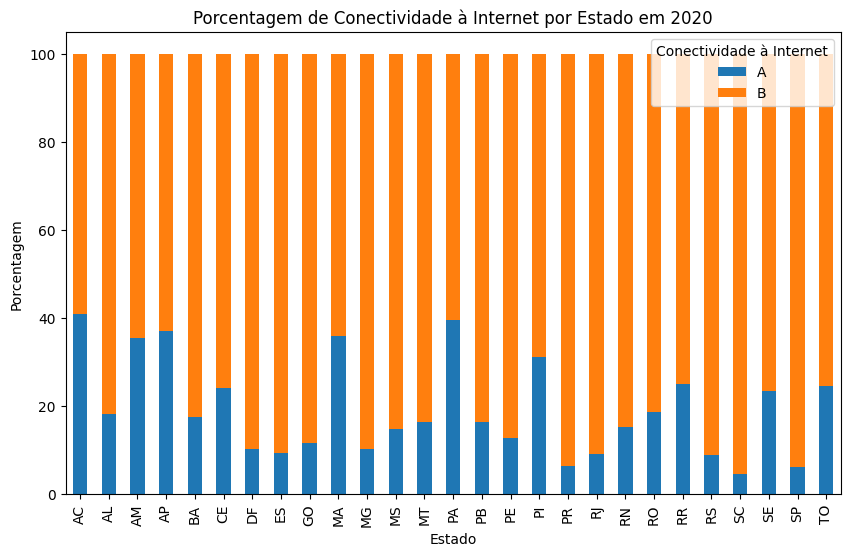

In [60]:
# Supondo que M2020_TD_INSCRITOS seja o DataFrame com as colunas 'SG_UF_PROVA' e 'Q025'

# Calculando a contagem de pessoas por estado e conectividade à internet
connectivity_counts = M2020_TD_INSCRITOS.groupby(['SG_UF_PROVA', 'Q025']).size().unstack(fill_value=0)

# Calculando as porcentagens de conectividade à internet por estado
connectivity_percentages = connectivity_counts.div(connectivity_counts.sum(axis=1), axis=0) * 100

# Plotando um gráfico de barras empilhadas das porcentagens
connectivity_percentages.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configurando rótulos e título
plt.xlabel('Estado')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de Conectividade à Internet por Estado em 2020')

# Exibindo o gráfico
plt.legend(title='Conectividade à Internet')
plt.show()

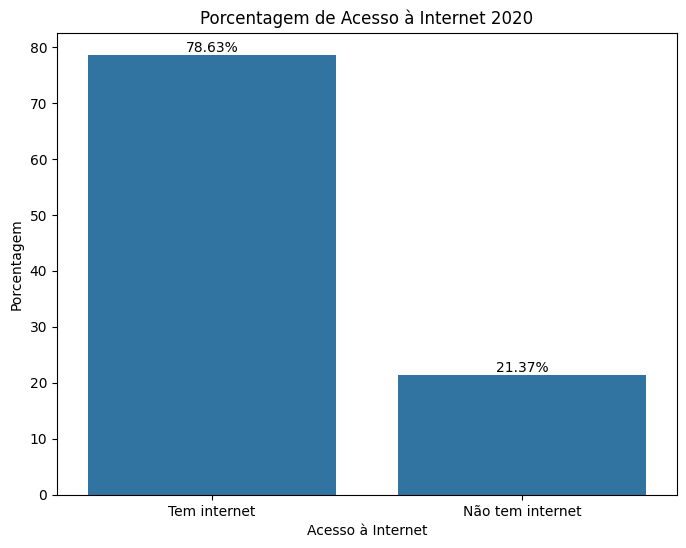

In [61]:
# Substituindo os valores de 'Q025' por rótulos mais descritivos
M2020_copia['conectividade'] = M2020_copia['conectividade'].replace({1: 'Tem internet', 0: 'Não tem internet'})

# Calculando a porcentagem de acesso à internet
internet_percentage20 = M2020_copia['conectividade'].value_counts(normalize=True) * 100

# Criando um gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=internet_percentage.index, y=internet_percentage.values)

# Adicionando rótulos e título
plt.xlabel('Acesso à Internet')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de Acesso à Internet 2020')

# Exibindo as porcentagens
for index, value in enumerate(internet_percentage):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')

# Exibindo o gráfico
plt.show()